# 导入包

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', 50) #数据最大显示行数
pd.set_option('display.max_columns', 50) #数据最大显示列数


# 导入数据

In [43]:
df=pd.read_csv('D:\my_dateset\wine.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.info() #查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [45]:
df.shape

(6497, 13)

In [46]:
df.isna().sum() #缺失值处理
df.dropna(inplace=True)

In [47]:
df.describe() #计算数据基本的一些值

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [48]:
df['quality'].unique() #查看特征值质量的值

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

# Label处理

In [49]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [50]:
le.classes_

array(['red', 'white'], dtype=object)

In [51]:
le.transform(le.classes_) #将label转为0,1

array([0, 1], dtype=int64)

In [52]:
dict(zip(le.classes_, le.transform(le.classes_))) #查看对应转化值

{'red': 0, 'white': 1}

In [53]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [55]:
df5=np.array(df)
df5

array([[ 0.  ,  7.4 ,  0.7 , ...,  0.56,  9.4 ,  5.  ],
       [ 0.  ,  7.8 ,  0.88, ...,  0.68,  9.8 ,  5.  ],
       [ 0.  ,  7.8 ,  0.76, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 1.  ,  6.5 ,  0.24, ...,  0.46,  9.4 ,  6.  ],
       [ 1.  ,  5.5 ,  0.29, ...,  0.38, 12.8 ,  7.  ],
       [ 1.  ,  6.  ,  0.21, ...,  0.32, 11.8 ,  6.  ]])

### label占比

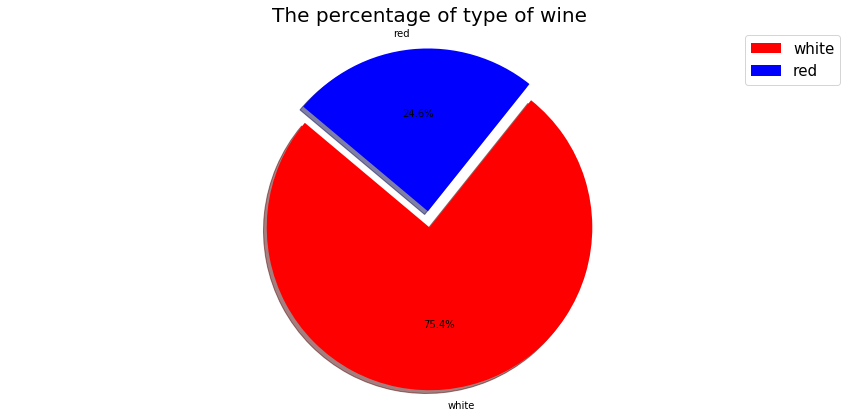

In [56]:
plt.figure(figsize=(15,7))
labels = 'white', 'red'
sizes = [4898,1599]
colors = ['red', 'blue']
explode = (0.1, 0 )
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of type of wine',fontsize=20)
plt.legend(('white', 'red'),fontsize=15)
plt.axis('equal')
plt.show()

# PCA数据降维处理

In [57]:
df1=df.iloc[:,1:12] #取特征值
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [58]:
pca=PCA(n_components=2) #降到2维
pca.fit(df1)
df2=pca.transform(df1) #降维后的结果
df2

array([[-84.11114893,  -0.14511749],
       [-48.779427  ,   5.84731927],
       [-63.73457506,  -0.87641627],
       ...,
       [ -4.89614162,   0.50856799],
       [ -8.18853172,  -8.97328116],
       [-19.4038995 ,  -4.26220226]])

In [66]:
pca.explained_variance_ratio_ # 降维后的各主成分的方差值占总方差值的比例，即方差贡献率

array([0.95375825, 0.04062775])

In [60]:
A=np.c_[df5[:,0],df2]
A

array([[  0.        , -84.11114893,  -0.14511749],
       [  0.        , -48.779427  ,   5.84731927],
       [  0.        , -63.73457506,  -0.87641627],
       ...,
       [  1.        ,  -4.89614162,   0.50856799],
       [  1.        ,  -8.18853172,  -8.97328116],
       [  1.        , -19.4038995 ,  -4.26220226]])

In [61]:
print(df2[:,0])

[-84.11114893 -48.779427   -63.73457506 ...  -4.89614162  -8.18853172
 -19.4038995 ]


In [62]:
df3=pd.DataFrame({'type':[df5[1:,0]],
                  '主成分1':[df2[:,0]],
                  '主成分2':[df2[:,1]]}) #若没有写index的值，则采用默认的index：0，1,2……
df3

,type,主成分1,主成分2
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-84.1111489299242, -48.77942699514318, -63.73...","[-0.14511749469155177, 5.847319272686193, -0.8..."


In [63]:
for df3 in df2:
    print(df3)

[-84.11114893  -0.14511749]
[-48.779427     5.84731927]
[-63.73457506  -0.87641627]
[-57.48126614  -0.34509804]
[-84.11114893  -0.14511749]
[-77.82123884   0.40990866]
[-58.90070413  -2.04810766]
[-95.85843148   6.74297208]
[-100.12594446    1.61211843]
[-16.45502012  -9.96410742]
[-53.04953385  -3.42694235]
[-16.45502012  -9.96410742]
[-58.65618605  -1.0614767 ]
[-89.44687927  -0.94179227]
[33.31720729 14.07409724]
[36.00729206 12.4090945 ]
[-11.5175516    7.22690418]
[-61.58390609  -0.38055702]
[-90.01936696  -3.80594735]
[-61.34670806   0.59476781]
[-54.70045151  11.33633719]
[-45.36145709   2.97206464]
[-81.44129198  -1.81993084]
[-52.48180317  -9.72549364]
[-75.95032676   8.20603688]
[-94.81624414   2.39678152]
[-108.08989787   -1.63392498]
[-81.44129198  -1.81993084]
[-82.44529362   2.54302037]
[-102.30251084    1.10310902]
[-36.04219089  -5.4018705 ]
[-78.63753651   9.87716411]
[ -6.38021952 -14.53226287]
[-29.42608635  16.88957349]
[-68.08157077  -1.89283483]
[-100.90494878   -

In [64]:
df2.columns="A","B"

AttributeError: 'numpy.ndarray' object has no attribute 'columns'